# Base de dados

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix

url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/transfusion.data"

dataset = pd.read_csv(url, header=None)

columns = len(dataset.columns)

y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns-1]

dataset

,0,1,2,3,4
0,1,2,50,12500,98
1,1,0,13,3250,28
2,1,1,16,4000,35
3,1,2,20,5000,45
4,2,1,24,6000,77
...,...,...,...,...,...
743,2,23,2,500,38
744,2,21,2,500,52
745,2,23,3,750,62
746,2,39,1,250,39


# Normalização

In [ ]:
x2 = X.values #retorna um array NumPy
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

display(X)

,0,1,2,3
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.013514,0.306122,0.306122,0.343750
3,0.027027,0.387755,0.387755,0.447917
4,0.013514,0.469388,0.469388,0.781250
...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000
744,0.283784,0.020408,0.020408,0.520833
745,0.310811,0.040816,0.040816,0.625000
746,0.527027,0.000000,0.000000,0.385417


# Separar os dados de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

# Treinar 2 árvores de decisão com características diferentes

In [46]:
from sklearn import tree

# Árvore 1
model1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
model1 = model1.fit(X_train, y_train)

# Árvore 2
model2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
model2 = model2.fit(X_train, y_train)

In [47]:
# Predição e Resultados
result1 = model1.predict(X_test)
result2 = model2.predict(X_test)

acc1 = metrics.accuracy_score(y_test, result1)
acc2 = metrics.accuracy_score(y_test, result2)

show1 = round(acc1 * 100)
show2 = round(acc2 * 100)

print("{}%".format(show1))

print(list(result1))
print(list(y_test))

confusion_matrix(y_test, result1)
confusion_matrix(y_test, result2)

76%
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


array([[ 18,  18],
       [ 13, 101]])

[Text(0.5, 0.875, 'x[0] <= 0.088\ngini = 0.362\nsamples = 598\nvalue = [142, 456]'),
 Text(0.25, 0.625, 'x[2] <= 0.051\ngini = 0.46\nsamples = 296\nvalue = [106, 190]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 0.161\ngini = 0.368\nsamples = 115\nvalue = [28, 87]'),
 Text(0.0625, 0.125, 'gini = 0.404\nsamples = 89\nvalue = [25, 64]'),
 Text(0.1875, 0.125, 'gini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.375, 0.375, 'x[3] <= 0.5\ngini = 0.49\nsamples = 181\nvalue = [78, 103]'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 117\nvalue = [63, 54]'),
 Text(0.4375, 0.125, 'gini = 0.359\nsamples = 64\nvalue = [15, 49]'),
 Text(0.75, 0.625, 'x[0] <= 0.196\ngini = 0.21\nsamples = 302\nvalue = [36, 266]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 0.141\ngini = 0.283\nsamples = 164\nvalue = [28.0, 136.0]'),
 Text(0.5625, 0.125, 'gini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(0.6875, 0.125, 'gini = 0.32\nsamples = 120\nvalue = [24, 96]'),
 Text(0.

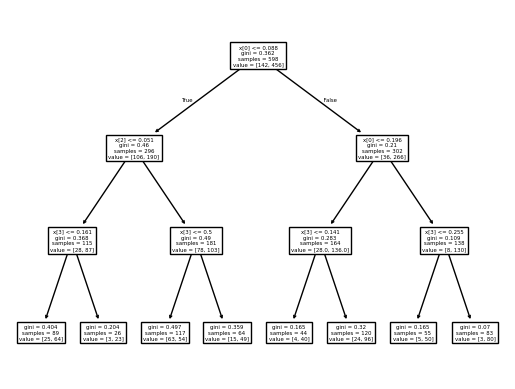

In [48]:
tree.plot_tree(model1)
tree.plot_tree(model2)

# Treinar 2 KNN com características diferentes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

columns = len(dataset.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

K = 5

model1Knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean', algorithm='brute')
model1Knn = model1Knn.fit(X_train, y_train)

model2Knn = KNeighborsClassifier(n_neighbors=K, metric='manhattan', algorithm='brute')
model2Knn = model2Knn.fit(X_train, y_train)

In [49]:
result1Knn = model1Knn.predict(X_test)
result2Knn = model2Knn.predict(X_test)

acc1 = metrics.accuracy_score(y_test, result1)
acc2 = metrics.accuracy_score(y_test, result2)

print("{}%".format(show1))

print(list(result1))
print(list(y_test))

76%
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
